In [105]:
# setup
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
depth = np.loadtxt("day09-input.txt",dtype = str)
test = np.loadtxt("day09-test.txt",dtype = str)

In [98]:
# test data
rows = len(test)
line0 = list(test[0])
cols = len(line0)
data_test2 = np.tile(0,(rows,cols))
for i in range(len(test)):
    line = list(test[i])
    for j in range(len(line)):
        data_test2[i,j] = int(line[j])

        
# input data
rows = len(depth)
line0 = list(depth[0])
cols = len(line0)
data_test = np.tile(0,(rows,cols))
for i in range(len(depth)):
    line = list(depth[i])
    for j in range(len(line)):
        data_test[i,j] = int(line[j])

In [99]:
# Part 1: determine the number of low points
n_edge = [0,0,0,0]
n_corner = [0,0,0]
n = [0,0,0,0,0]
count = 0
risk = 0

for i in range(len(data_test)):
    for j in range(len(data_test[i])):
        target = data_test[i,j]
        
        # first row 
        if i == 0:
            if j == 0:
                n_corner[0] = target
                n_corner[1] = data_test[i,j+1]
                n_corner[2] = data_test[i+1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        #print('low point found 1:',target)
            if j > 0:
                if j != cols-1:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j+1]
                    n_edge[2] = data_test[i,j-1]
                    n_edge[3] = data_test[i+1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            #print('low point found 2:',target)
            if j == cols -1:
                n_corner[0] = target
                n_corner[1] = data_test[i,j-1]
                n_corner[2] = data_test[i+1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        #print('low point found 3:',target)
       
        # main body of data
        if i > 0:
            if i != rows-1:
                if j == 0:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j+1]
                    n_edge[2] = data_test[i-1,j]
                    n_edge[3] = data_test[i+1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            #print('low point found 4:',target)
                if j > 0:
                    if j != cols-1:
                        n[0] = target
                        n[1] = data_test[i,j+1]
                        n[2] = data_test[i,j-1]
                        n[3] = data_test[i+1,j]
                        n[4] = data_test[i-1,j]
                        if min(n) == target:
                            if n.count(target) == 1:
                                count += 1
                                risk += target + 1
                                #print('low point found 5:',target)
                if j == cols - 1:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j-1]
                    n_edge[2] = data_test[i-1,j]
                    n_edge[3] = data_test[i+1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            #print('low point found 6:',target)
        
        # last row
        if i == rows-1:
            if j == 0:
                n_corner[0] = target
                n_corner[1] = data_test[i,j+1]
                n_corner[2] = data_test[i-1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                    #print('low point found 7:',target)
            if j > 0:
                if j != cols -1:
                    n_edge[0] = target
                    n_edge[1] = data_test[i,j+1]
                    n_edge[2] = data_test[i,j-1]
                    n_edge[3] = data_test[i-1,j]
                    if min(n_edge) == target:
                        if n_edge.count(target) == 1:
                            count += 1
                            risk += target + 1
                            #print('low point found 8:',target)
            if j == cols - 1:
                n_corner[0] = target
                n_corner[1] = data_test[i,j-1]
                n_corner[2] = data_test[i-1,j]
                if min(n_corner) == target:
                    if n_corner.count(target) == 1:
                        count += 1
                        risk += target + 1
                        #print('low point found 9:',target)
    n_edge = [0,0,0,0]
    n_corner = [0,0,0]
    n = [0,0,0,0,0]
    target = 0
print('Part 1 Solution = ',risk)
# Solution = 558, confirmed 12/9/2021

Part 1 Solution =  558


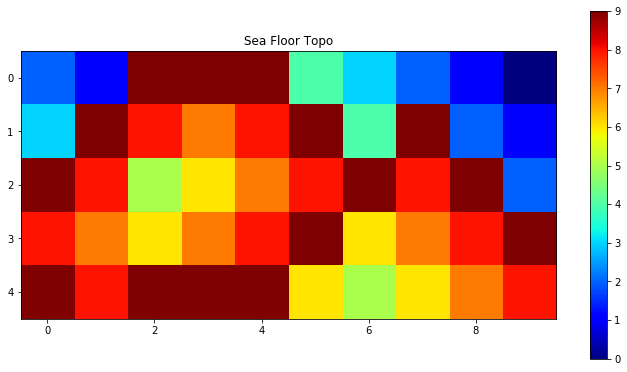

In [103]:
I = data_test2
plt.figure(figsize=(6*2, 3.2*2))
plt.imshow(I,cmap = "jet" , vmin=0, vmax=9)
plt.colorbar()
plt.title( 'Sea Floor Topo' )
plt.show()

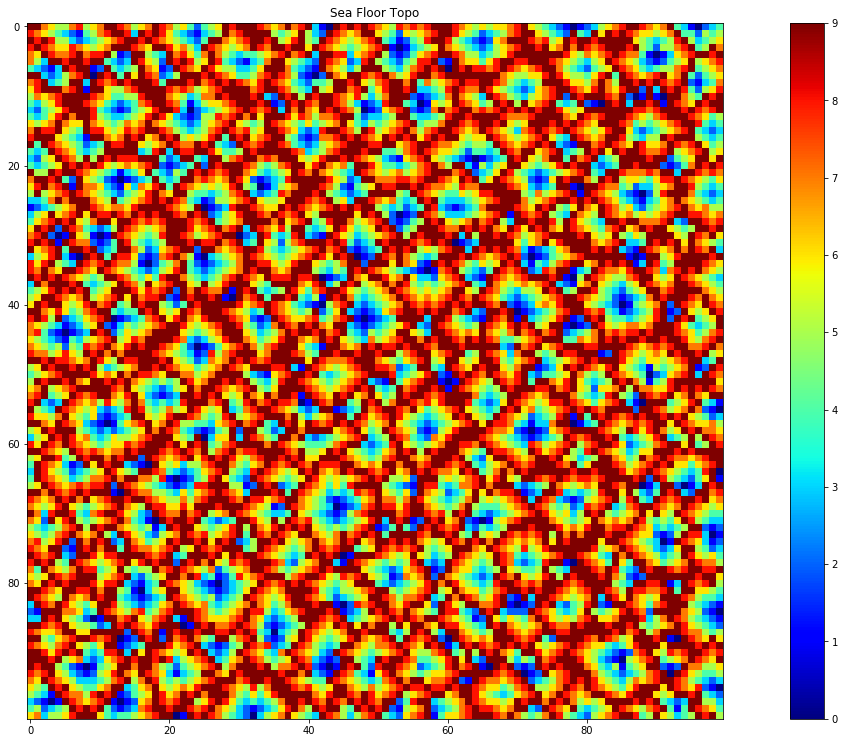

In [107]:
H = data_test
plt.figure(figsize=(6*4, 3.2*4))
plt.imshow(H,cmap = "jet" , vmin=0, vmax=9)
plt.colorbar()
plt.title( 'Sea Floor Topo' )
plt.show()